### Name : Dhwani Hingu | Student No. : x19216742 | Subject : DMML

## what are the factors that affects employee’s promotion? 

## importing files

In [144]:
# Load libraries
#from pandas import read_csv
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import missingno as msno
import numpy as np

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report 
from sklearn.metrics import roc_auc_score,roc_curve,f1_score,recall_score,precision_score
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder


In [65]:
import warnings
warnings.filterwarnings('ignore')

## Reading Data

In [66]:
train= pd.read_csv('C:/Users/Ab/Desktop/DMML_Python/HR_Analytics-Datasets/HR Analytics Employee Promotion Data/train-promotion.csv')
print("Structure of Dataset:", train.shape)
display(train.head())

Structure of Dataset: (54808, 13)


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


## Statistical Summary

In [67]:
# descriptions
print(train.describe())

        employee_id  no_of_trainings           age  previous_year_rating  \
count  54808.000000     54808.000000  54808.000000          50684.000000   
mean   39195.830627         1.253011     34.803915              3.329256   
std    22586.581449         0.609264      7.660169              1.259993   
min        1.000000         1.000000     20.000000              1.000000   
25%    19669.750000         1.000000     29.000000              3.000000   
50%    39225.500000         1.000000     33.000000              3.000000   
75%    58730.500000         1.000000     39.000000              4.000000   
max    78298.000000        10.000000     60.000000              5.000000   

       length_of_service   awards_won?  avg_training_score   is_promoted  
count       54808.000000  54808.000000        54808.000000  54808.000000  
mean            5.865512      0.023172           63.386750      0.085170  
std             4.265094      0.150450           13.371559      0.279137  
min            

## Checking Null values in Dataset

In [68]:
#Checking for missing data

#print("Following are Missing Data in the Training Dataset:\n",train.isnull().sum())

#Checking for missing data (In Percentage(%))

#print("Missing Data in the Training Dataset (In %):\n",(train.isnull().sum()/len(train))*100)



missing_values = train.count().sum()
total_values = np.product(train.shape)
percentages = train.isna().sum().reset_index().rename(columns={'index': 'Column', 0:'Missing'})
percentages['Percentage'] = percentages['Missing']/train.shape[0]*100
print(f'Amount of total missing data in train set: {missing_values}\nRelative amount of missing data: {missing_values/total_values*100:.3f}%')
print('-'*20)
print(f'Missing data per column:\n\n',percentages)

Amount of total missing data in train set: 705971
Relative amount of missing data: 99.083%
--------------------
Missing data per column:

                   Column  Missing  Percentage
0            employee_id        0    0.000000
1             department        0    0.000000
2                 region        0    0.000000
3              education     2409    4.395344
4                 gender        0    0.000000
5    recruitment_channel        0    0.000000
6        no_of_trainings        0    0.000000
7                    age        0    0.000000
8   previous_year_rating     4124    7.524449
9      length_of_service        0    0.000000
10           awards_won?        0    0.000000
11    avg_training_score        0    0.000000
12           is_promoted        0    0.000000


In [69]:
emp_promotion = train.copy()

In [70]:
emp_promotion

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,45,0


## Dropping Null values

In [71]:
emp_promotion=emp_promotion.dropna()

In [72]:
emp_promotion.shape

(48660, 13)

## Feature Engineering

In [73]:
emp_promotion['department'].value_counts()

Sales & Marketing    14239
Operations           10547
Procurement           6641
Technology            6502
Analytics             4610
Finance               2219
HR                    2142
R&D                    893
Legal                  867
Name: department, dtype: int64

In [74]:
emp_promotion['education'].value_counts()

Bachelor's          33404
Master's & above    14798
Below Secondary       458
Name: education, dtype: int64

In [75]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
def ord_encode(df, col_name, cats):
    df[col_name]= OrdinalEncoder(categories= [cats], dtype= int).fit_transform(emp_promotion[col_name].values.reshape(-1,1))
    #test[col_name]= OrdinalEncoder(categories= [cats], dtype= int).fit_transform(new_df[col_name].values.reshape(-1,1))
    return df

In [76]:
emp_promotion= ord_encode(emp_promotion, 'education', ["Below Secondary","Bachelor's","Master's & above"])

In [77]:
emp_promotion['education'].value_counts()

1    33404
2    14798
0      458
Name: education, dtype: int64

In [78]:
#gender
emp_promotion['gender'].value_counts()

m    33852
f    14808
Name: gender, dtype: int64

In [79]:
#recruitment_channel
emp_promotion['recruitment_channel'].value_counts()

other       27017
sourcing    20623
referred     1020
Name: recruitment_channel, dtype: int64

In [80]:
#region
emp_promotion['region'].nunique()

34

In [81]:
emp_promotion

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,2,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,1,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,1,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,1,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,1,m,other,1,45,3.0,2,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54802,6915,Sales & Marketing,region_14,1,m,other,2,31,1.0,2,0,49,0
54803,3030,Technology,region_14,1,m,sourcing,1,48,3.0,17,0,78,0
54804,74592,Operations,region_27,2,f,other,1,37,2.0,6,0,56,0
54805,13918,Analytics,region_1,1,m,other,1,27,5.0,3,0,79,0


## Dummy variables

In [82]:
#department
department_dummy=pd.get_dummies(emp_promotion['department'],drop_first=True)


In [83]:
emp_promotion=pd.concat([department_dummy,emp_promotion],axis=1)
emp_promotion.drop('department',axis=1,inplace=True)

In [84]:
emp_promotion

,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology,employee_id,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,0,0,0,0,0,0,1,0,65438,region_7,2,f,sourcing,1,35,5.0,8,0,49,0
1,0,0,0,1,0,0,0,0,65141,region_22,1,m,other,1,30,5.0,4,0,60,0
2,0,0,0,0,0,0,1,0,7513,region_19,1,m,sourcing,1,34,3.0,7,0,50,0
3,0,0,0,0,0,0,1,0,2542,region_23,1,m,other,2,39,1.0,10,0,50,0
4,0,0,0,0,0,0,0,1,48945,region_26,1,m,other,1,45,3.0,2,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54802,0,0,0,0,0,0,1,0,6915,region_14,1,m,other,2,31,1.0,2,0,49,0
54803,0,0,0,0,0,0,0,1,3030,region_14,1,m,sourcing,1,48,3.0,17,0,78,0
54804,0,0,0,1,0,0,0,0,74592,region_27,2,f,other,1,37,2.0,6,0,56,0
54805,0,0,0,0,0,0,0,0,13918,region_1,1,m,other,1,27,5.0,3,0,79,0


In [85]:
#recruitment_channel
recruitment_channel_dummy=pd.get_dummies(emp_promotion['recruitment_channel'],drop_first=True)
emp_promotion=pd.concat([recruitment_channel_dummy,emp_promotion],axis=1)
emp_promotion.drop('recruitment_channel',axis=1,inplace=True)

In [86]:
#gender
gender_dummy=pd.get_dummies(emp_promotion['gender'],drop_first=True)
emp_promotion=pd.concat([gender_dummy,emp_promotion],axis=1)
emp_promotion.drop('gender',axis=1,inplace=True)

In [87]:
#region
region_dummy=pd.get_dummies(emp_promotion['region'],drop_first=True)
emp_promotion=pd.concat([region_dummy,emp_promotion],axis=1)
emp_promotion.drop('region',axis=1,inplace=True)

In [88]:
emp_promotion

,region_10,region_11,region_12,region_13,region_14,region_15,region_16,region_17,region_18,region_19,...,Technology,employee_id,education,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,0,0,0,0,0,0,0,0,0,0,...,0,65438,2,1,35,5.0,8,0,49,0
1,0,0,0,0,0,0,0,0,0,0,...,0,65141,1,1,30,5.0,4,0,60,0
2,0,0,0,0,0,0,0,0,0,1,...,0,7513,1,1,34,3.0,7,0,50,0
3,0,0,0,0,0,0,0,0,0,0,...,0,2542,1,2,39,1.0,10,0,50,0
4,0,0,0,0,0,0,0,0,0,0,...,1,48945,1,1,45,3.0,2,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54802,0,0,0,0,1,0,0,0,0,0,...,0,6915,1,2,31,1.0,2,0,49,0
54803,0,0,0,0,1,0,0,0,0,0,...,1,3030,1,1,48,3.0,17,0,78,0
54804,0,0,0,0,0,0,0,0,0,0,...,0,74592,2,1,37,2.0,6,0,56,0
54805,0,0,0,0,0,0,0,0,0,0,...,0,13918,1,1,27,5.0,3,0,79,0


In [89]:
emp_promotion

,region_10,region_11,region_12,region_13,region_14,region_15,region_16,region_17,region_18,region_19,...,Technology,employee_id,education,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,0,0,0,0,0,0,0,0,0,0,...,0,65438,2,1,35,5.0,8,0,49,0
1,0,0,0,0,0,0,0,0,0,0,...,0,65141,1,1,30,5.0,4,0,60,0
2,0,0,0,0,0,0,0,0,0,1,...,0,7513,1,1,34,3.0,7,0,50,0
3,0,0,0,0,0,0,0,0,0,0,...,0,2542,1,2,39,1.0,10,0,50,0
4,0,0,0,0,0,0,0,0,0,0,...,1,48945,1,1,45,3.0,2,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54802,0,0,0,0,1,0,0,0,0,0,...,0,6915,1,2,31,1.0,2,0,49,0
54803,0,0,0,0,1,0,0,0,0,0,...,1,3030,1,1,48,3.0,17,0,78,0
54804,0,0,0,0,0,0,0,0,0,0,...,0,74592,2,1,37,2.0,6,0,56,0
54805,0,0,0,0,0,0,0,0,0,0,...,0,13918,1,1,27,5.0,3,0,79,0


## Dropping unnessary column

In [90]:
emp_promotion.drop(['employee_id'], axis = 1, inplace=True)

## Box plot for outliers

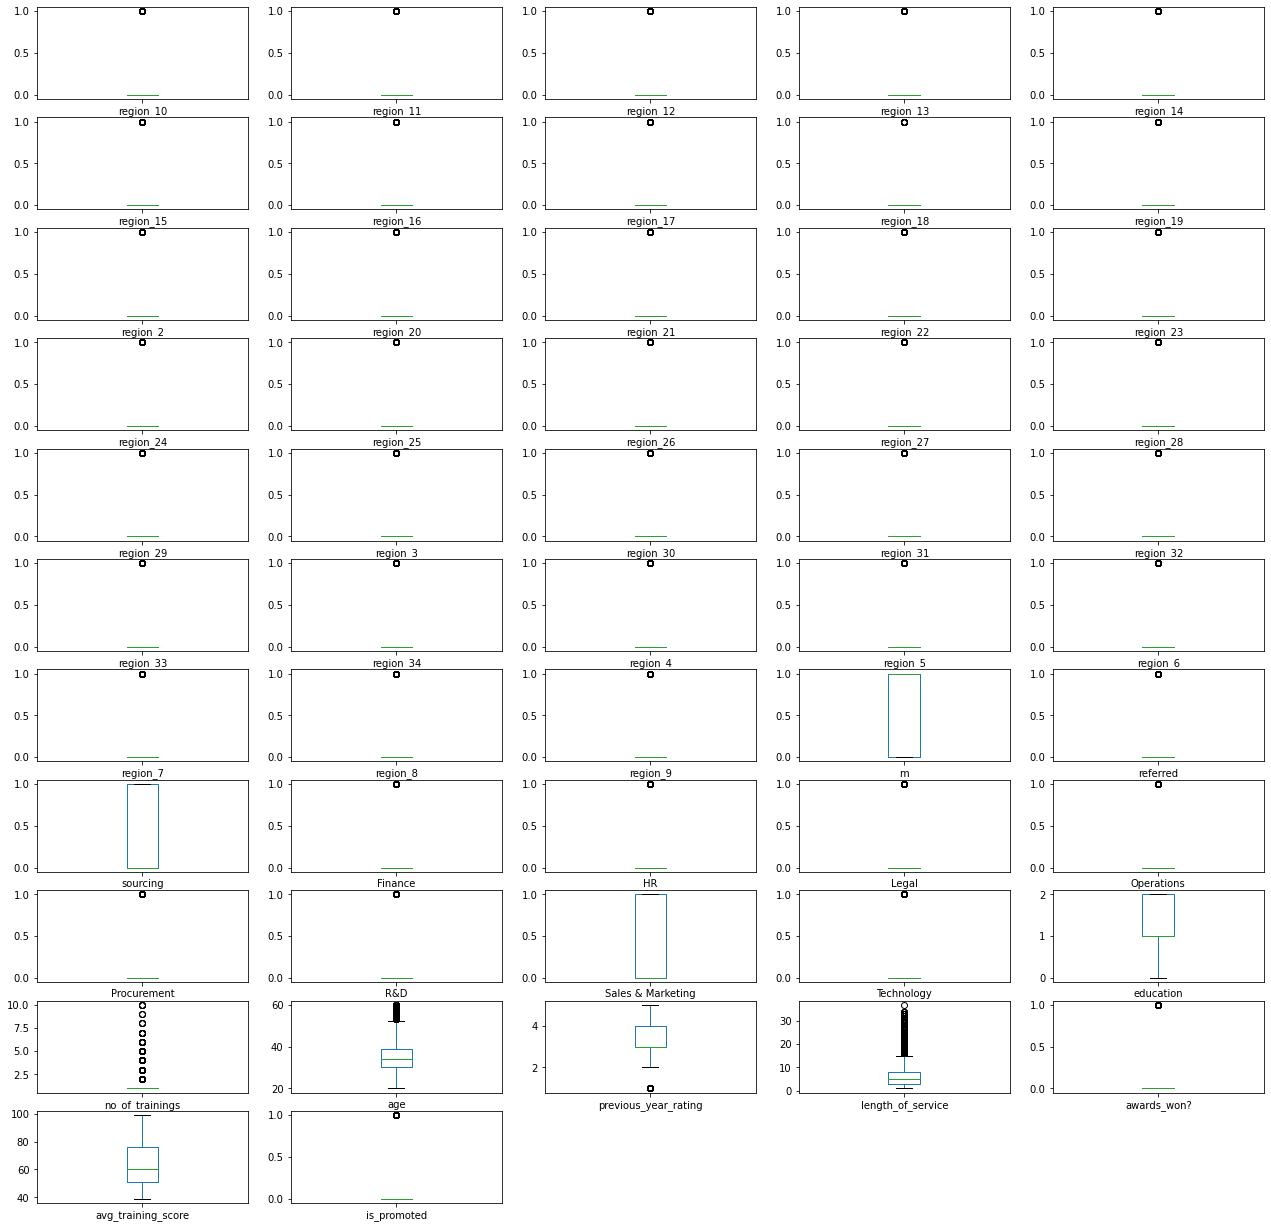

In [93]:
emp_promotion.plot(kind='box', figsize=(22,22), layout=(11,5), sharex=False, subplots=True);

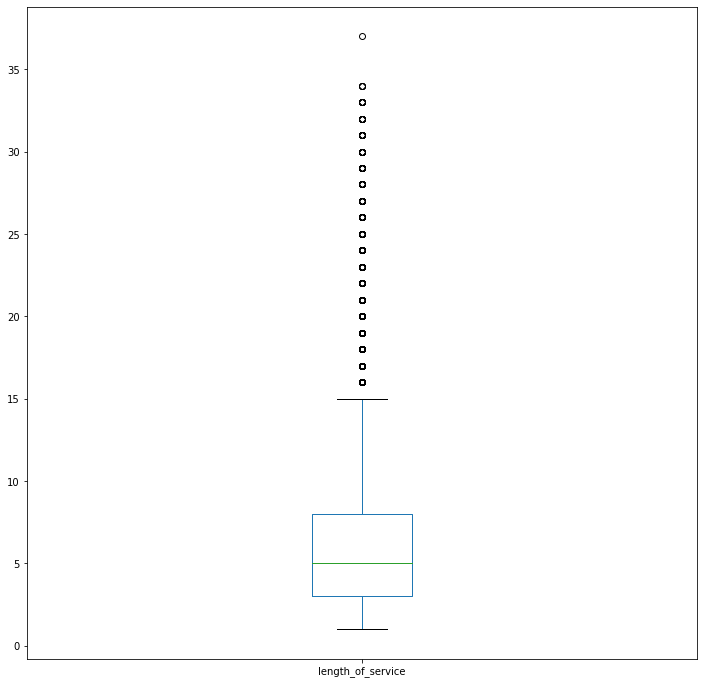

In [94]:
emp_promotion['length_of_service'].plot(kind='box', figsize=(12,12), sharex=False, subplots=True);

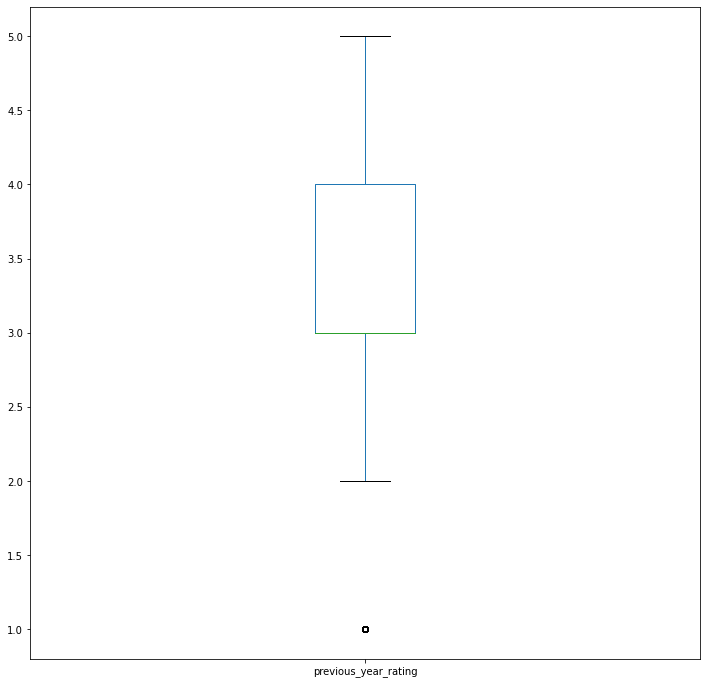

In [95]:
emp_promotion['previous_year_rating'].plot(kind='box', figsize=(12,12), sharex=False, subplots=True);

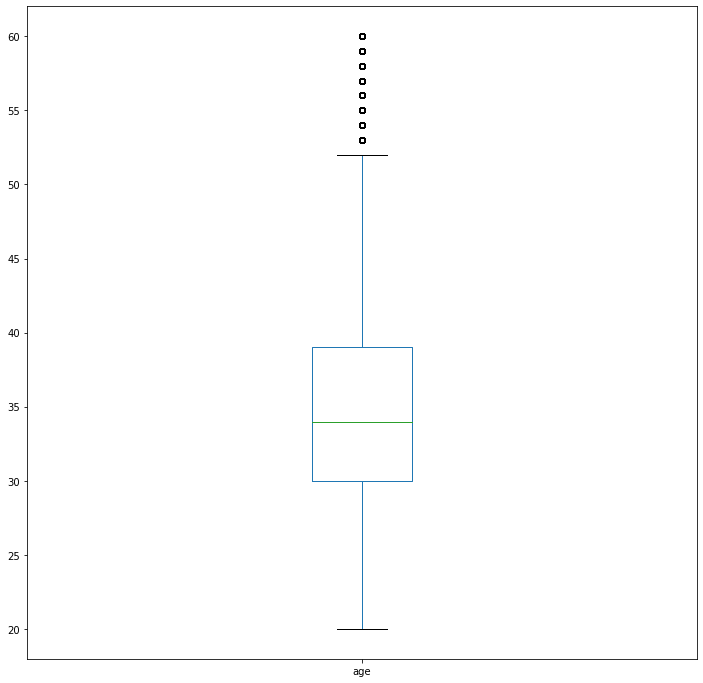

In [96]:
emp_promotion['age'].plot(kind='box', figsize=(12,12), sharex=False, subplots=True);

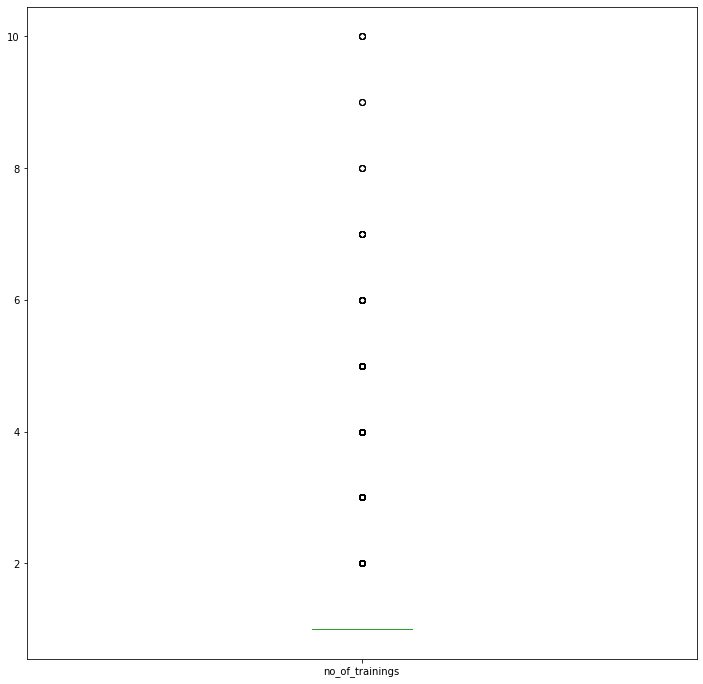

In [97]:
emp_promotion['no_of_trainings'].plot(kind='box', figsize=(12,12), sharex=False, subplots=True);

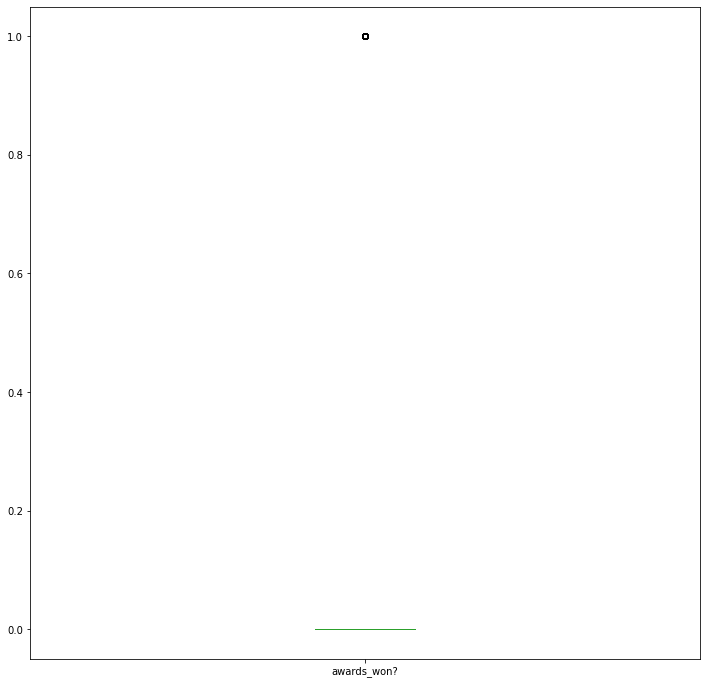

In [98]:
emp_promotion['awards_won?'].plot(kind='box', figsize=(12,12), sharex=False, subplots=True);

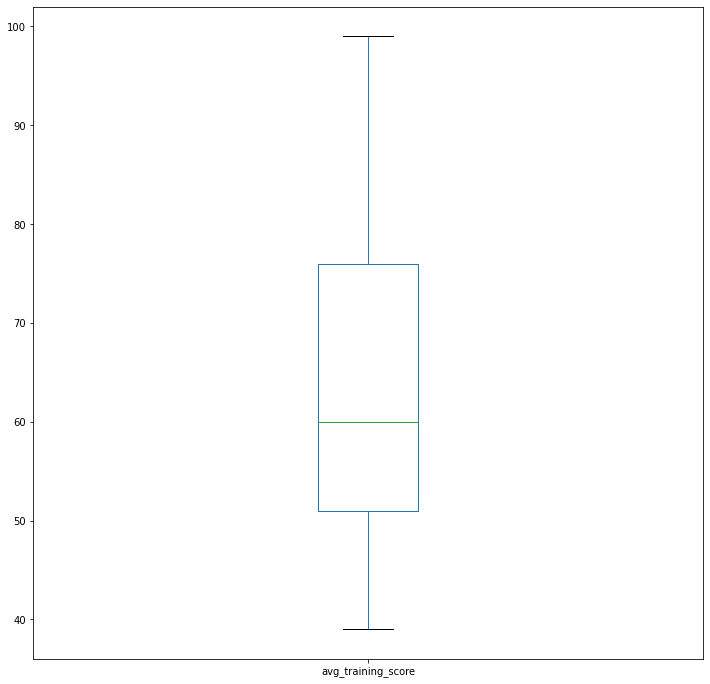

In [99]:
emp_promotion['avg_training_score'].plot(kind='box', figsize=(12,12), sharex=False, subplots=True);

## Training model

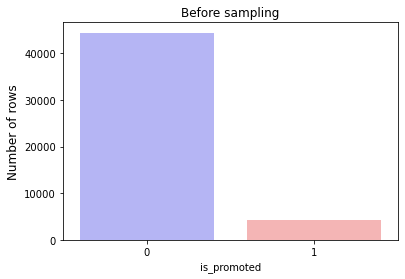

In [108]:
sns.countplot(x='is_promoted', data=emp_promotion, palette='bwr')
plt.ylabel('Number of rows', fontsize=12)
plt.title('Before sampling')
plt.show()

In [134]:
X = emp_promotion.drop("is_promoted",axis=1)   #Feature Matrix
y = emp_promotion["is_promoted"]

In [135]:
#smote
from imblearn.over_sampling import SMOTE   
oversample = SMOTE()
smote = SMOTE(random_state = 0)
X_smote, y_smote = smote.fit_resample(X,y)

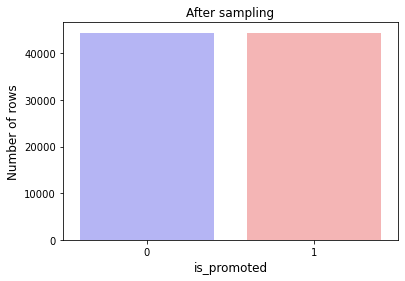

In [136]:
plt.figure(figsize=(6, 4))
sns.barplot(y_smote.value_counts().index.astype(int),
            y_smote.value_counts().values, palette='bwr')
plt.ylabel('Number of rows', fontsize=12)
plt.xlabel('is_promoted', fontsize=12)
plt.title('After sampling')
plt.show()

,region_10,region_11,region_12,region_13,region_14,region_15,region_16,region_17,region_18,region_19,...,R&D,Sales & Marketing,Technology,education,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,2,1,35,5.0,8,0,49
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,30,5.0,4,0,60
2,0,0,0,0,0,0,0,0,0,1,...,0,1,0,1,1,34,3.0,7,0,50
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,2,39,1.0,10,0,50
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,45,3.0,2,0,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54802,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,2,31,1.0,2,0,49
54803,0,0,0,0,1,0,0,0,0,0,...,0,0,1,1,1,48,3.0,17,0,78
54804,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,1,37,2.0,6,0,56
54805,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,27,5.0,3,0,79


## Feature Selection

                   Specs        Score
47  previous_year_rating  9459.294915
50    avg_training_score  7879.060145
35              sourcing  2847.215501
45       no_of_trainings  2764.988735
10              region_2  2668.218945
33                     m  2298.049085
42     Sales & Marketing  1339.770382
37                    HR  1315.041464
17             region_26  1274.122054
3              region_13  1209.772650
5              region_15  1175.111652
23             region_31  1122.897825
30              region_7  1122.699021
6              region_16   938.246600
1              region_11   898.864775
20             region_29   763.925666
44             education   761.963488
18             region_27   756.344998
36               Finance   723.027987
24             region_32   621.090023


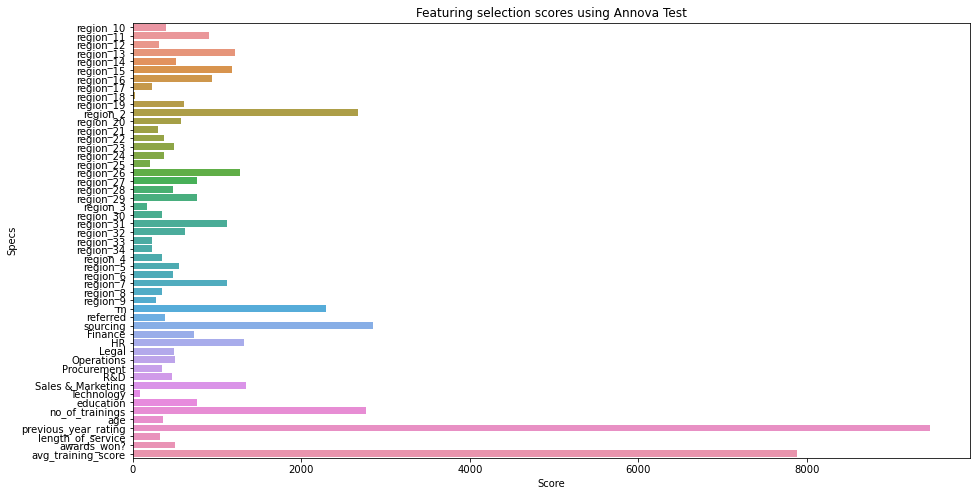

In [119]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(X_smote,y_smote)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_smote.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 10 best features

plt.figure(figsize = (15,8))
plt.title("Featuring selection scores using Annova Test")

ax = sns.barplot(x="Score", y="Specs", data=featureScores)


In [121]:
prom_features = X_smote[['previous_year_rating', 'avg_training_score', 'sourcing', 'no_of_trainings', 'region_2', 'm', 'Sales & Marketing', 'region_26' , 'region_13' , 'HR', 'region_15', 'region_31', 'region_7', 'region_16', 'region_11', 'region_29', 'education', 'region_27', 'Finance', 'region_32']].copy()

In [122]:
prom_features

,previous_year_rating,avg_training_score,sourcing,no_of_trainings,region_2,m,Sales & Marketing,region_26,region_13,HR,region_15,region_31,region_7,region_16,region_11,region_29,education,region_27,Finance,region_32
0,5.000000,49,1,1,0,0,1,0,0,0,0,0,1,0,0,0,2,0,0,0
1,5.000000,60,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,3.000000,50,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1.000000,50,0,2,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,3.000000,73,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88851,5.000000,50,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
88852,4.544874,82,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
88853,5.000000,77,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0
88854,5.000000,78,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [123]:
X_train, X_test, y_train, y_test = train_test_split(prom_features,
                                                    y_smote,
                                                    test_size=0.2,
                                                    random_state=0)

In [139]:
X_test

,previous_year_rating,avg_training_score,sourcing,no_of_trainings,region_2,m,Sales & Marketing,region_26,region_13,HR,region_15,region_31,region_7,region_16,region_11,region_29,education,region_27,Finance,region_32
8598,4.000000,60,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
46773,5.000000,60,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
5731,4.000000,77,1,2,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0
22844,3.000000,69,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0
30791,5.000000,48,0,1,0,1,1,0,0,0,0,0,0,0,0,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61084,4.596569,75,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
53993,3.000000,88,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0
7583,5.000000,50,0,1,0,1,1,0,0,0,0,0,0,0,0,0,2,0,0,0
74657,3.651058,54,0,2,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


              precision    recall  f1-score   support

           0       0.86      0.41      0.55      8776
           1       0.62      0.93      0.74      8996

    accuracy                           0.67     17772
   macro avg       0.74      0.67      0.65     17772
weighted avg       0.74      0.67      0.65     17772



<AxesSubplot:>

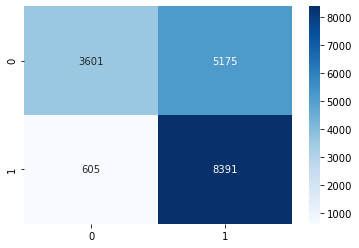

In [147]:
#GaussianNB
gb = GaussianNB()
gb.fit(X_train,y_train)
#print(classification_report(y_smote, gb.predict(X_smote)))
gb_pred=gb.predict(X_test)
print(classification_report(y_test, gb_pred))


cf_matrix_gb = confusion_matrix(y_test, gb_pred)
sns.heatmap(cf_matrix_gb, annot = True, cmap='Blues', fmt='g')

In [148]:
gb_accuracy_score=accuracy_score(y_test,gb_pred)

gb_train_score=lr.score(X_train,y_train)

gb_f1_score=f1_score(y_test,gb_pred)

gb_recall_score=recall_score(y_test,gb_pred)

gb_precision_score=precision_score(y_test,gb_pred)

[0.76114784 0.76269518 0.77352652 0.77549585 0.78081035 0.76294316
 0.76969612 0.76828925 0.77560495 0.77476083]
0.7704970052703726
0.006290107097542057
              precision    recall  f1-score   support

           0       0.79      0.76      0.77      8776
           1       0.77      0.80      0.79      8996

    accuracy                           0.78     17772
   macro avg       0.78      0.78      0.78     17772
weighted avg       0.78      0.78      0.78     17772



<AxesSubplot:>

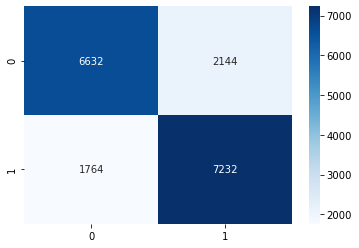

In [142]:
#LogisticRegression
lr = LogisticRegression()
scores = cross_val_score(lr, X_train, y_train, cv=10,scoring = "accuracy" );
print(scores)
print(scores.mean())
print(scores.std())

lr.fit(X_train,y_train)
lr_pred=lr.predict(X_test)

print(classification_report(y_test, lr_pred))

cf_matrix_lr = confusion_matrix(y_test, lr_pred)
sns.heatmap(cf_matrix_lr, annot = True, cmap='Blues', fmt='g')




In [145]:
lr_accuracy_score=accuracy_score(y_test,lr_pred)

lr_train_score=lr.score(X_train,y_train)

lr_f1_score=f1_score(y_test,lr_pred)

lr_recall_score=recall_score(y_test,lr_pred)

lr_precision_score=precision_score(y_test,lr_pred)

In [149]:
results=pd.DataFrame({
    "Algorithm":["GaussianNB","LogisticRegression"],
    "Accuracy":[gb_accuracy_score,lr_accuracy_score],
    "Train Score":[gb_train_score,lr_train_score],
    "f1_Score":[gb_f1_score,lr_f1_score],
     "Recall_Score":[gb_recall_score,lr_recall_score],
      "Precision_Score":[gb_precision_score,lr_precision_score]})

results.sort_values(ascending=False,by="Accuracy")

,Algorithm,Accuracy,Train Score,f1_Score,Recall_Score,Precision_Score
1,LogisticRegression,0.780104,0.769709,0.787285,0.803913,0.771331
0,GaussianNB,0.674769,0.769709,0.743817,0.932748,0.618532
